In [1]:
#第一题
import pandas as pd
import os

csv_path = r"E:\ESE5023_Assignments_12532748\ESE5023_Assignments_12532748\PS4\usgs_earthquakes.csv"
eq = pd.read_csv(csv_path)
print(eq.head())
print(eq.columns)

                      time   latitude  longitude  depth   mag magType  nst  \
0  2014-01-31 23:53:37.000  60.252000  -152.7081  90.20  1.10      ml  NaN   
1  2014-01-31 23:48:35.452  37.070300  -115.1309   0.00  1.33      ml  4.0   
2  2014-01-31 23:47:24.000  64.671700  -149.2528   7.10  1.30      ml  NaN   
3  2014-01-31 23:30:54.000  63.188700  -148.9575  96.50  0.80      ml  NaN   
4  2014-01-31 23:30:52.210  32.616833  -115.6925  10.59  1.34      ml  6.0   

      gap     dmin     rms net          id                   updated  \
0     NaN      NaN  0.2900  ak  ak11155107  2014-02-05T19:34:41.515Z   
1  171.43  0.34200  0.0247  nn  nn00436847  2014-02-01T01:35:09.000Z   
2     NaN      NaN  1.0000  ak  ak11151142  2014-02-01T00:03:53.010Z   
3     NaN      NaN  1.0700  ak  ak11151135  2014-01-31T23:41:25.007Z   
4  285.00  0.04321  0.2000  ci  ci37171541  2014-02-01T00:13:20.107Z   

                               place        type  
0  26km S of Redoubt Volcano, Alaska  earthquak

In [2]:
# 把 time 列转换为 datetime
eq["time"] = pd.to_datetime(eq["time"])

# 看看时间范围
print(eq["time"].min())
print(eq["time"].max())

2014-01-01 00:01:16.610000
2014-12-31 23:54:33.900000


In [3]:
# 按 mag 从大到小排序
eq_sorted = eq.sort_values(by="mag", ascending=False)

# 快速看看震级最大的几条
print(eq_sorted[["time", "latitude", "longitude", "mag"]].head(10))

                          time  latitude  longitude  mag
37371  2014-04-01 23:46:47.260  -19.6097   -70.7691  8.2
50562  2014-06-23 20:53:09.700   51.8486   178.7352  7.9
36918  2014-04-03 02:43:13.110  -20.5709   -70.4931  7.7
33808  2014-04-12 20:14:39.300  -11.2701   162.1481  7.6
31496  2014-04-19 13:28:00.810   -6.7547   155.0241  7.5
33537  2014-04-13 12:36:19.230  -11.4633   162.0511  7.4
95913  2014-10-14 03:51:34.460   12.5262   -88.1225  7.3
31850  2014-04-18 14:27:24.920   17.3970  -100.9723  7.2
106285 2014-11-15 02:31:41.720    1.8929   126.5217  7.1
111052 2014-11-01 18:57:22.380  -19.6903  -177.7587  7.1


In [4]:
# 去掉 mag 是 NaN 的行
eq_clean = eq_sorted.dropna(subset=["mag"])

print("After dropna, rows:", len(eq_clean))


After dropna, rows: 120065


In [5]:
# 取震级最大的前 50 个
top50 = eq_clean.head(50)

# 只保留画图要用的列
top50 = top50[["latitude", "longitude", "mag"]]

top50

,latitude,longitude,mag
37371,-19.6097,-70.7691,8.2
50562,51.8486,178.7352,7.9
36918,-20.5709,-70.4931,7.7
33808,-11.2701,162.1481,7.6
31496,-6.7547,155.0241,7.5
33537,-11.4633,162.0511,7.4
95913,12.5262,-88.1225,7.3
31850,17.3970,-100.9723,7.2
106285,1.8929,126.5217,7.1
111052,-19.6903,-177.7587,7.1


In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

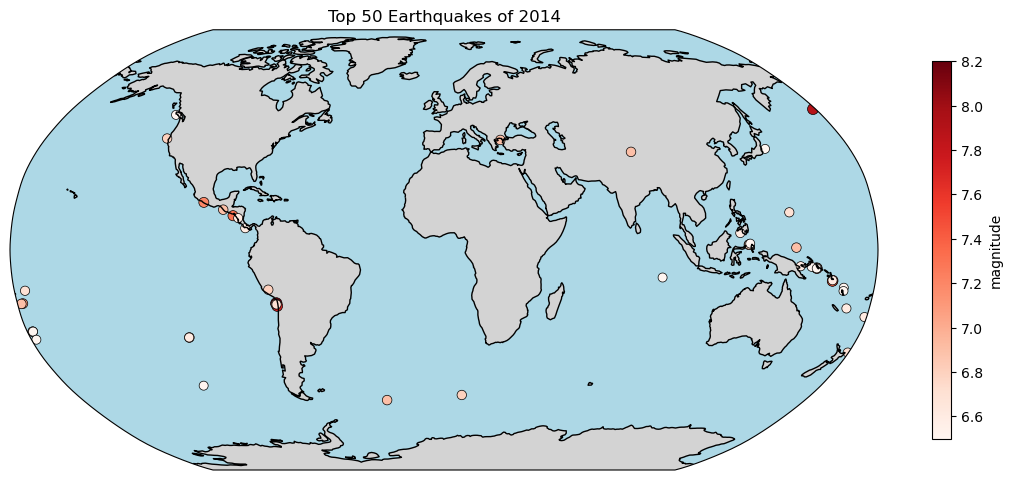

In [10]:
fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

sc = ax.scatter(
    top50["longitude"],
    top50["latitude"],
    c=top50["mag"],
    s=top50["mag"]**2,
    cmap="Reds",
    edgecolor="black",
    linewidth=0.5,
    transform=ccrs.PlateCarree()
)

cbar = plt.colorbar(sc, orientation="vertical", shrink=0.7)
cbar.set_label("magnitude")

ax.set_title("Top 50 Earthquakes of 2014")

plt.show()



In [16]:
#第二题
import xarray as xr
import glob
import numpy as np


In [17]:
data_path = r"E:\ESE5023_Assignments_12532748\ESE5023_Assignments_12532748\PS4\MERRA2_Data"

files = sorted(
    glob.glob(data_path + r"\MERRA2_400.statM_2d_slv_Nx.*.nc4")
)

ds = xr.open_mfdataset(
    files,
    combine="by_coords"
)

In [18]:
print(ds)
print(ds.time.min().values, ds.time.max().values)

<xarray.Dataset> Size: 299MB
Dimensions:         (time: 36, lat: 361, lon: 576)
Coordinates:
  * lon             (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat             (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time            (time) datetime64[ns] 288B 2014-01-01T00:30:00 ... 2016-1...
Data variables:
    HOURNORAIN      (time, lat, lon) float32 30MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    T2MMAX          (time, lat, lon) float32 30MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    T2MMEAN         (time, lat, lon) float32 30MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    T2MMIN          (time, lat, lon) float32 30MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    TPRECMAX        (time, lat, lon) float32 30MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    Var_HOURNORAIN  (time, lat, lon) float32 30MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    Var_T2MMAX      (time, lat, lon)

In [19]:
t2m = ds["T2MMEAN"]
print(t2m)

<xarray.DataArray 'T2MMEAN' (time: 36, lat: 361, lon: 576)> Size: 30MB
dask.array<concatenate, shape=(36, 361, 576), dtype=float32, chunksize=(1, 91, 144), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 288B 2014-01-01T00:30:00 ... 2016-12-01T00...
Attributes:
    long_name:       2-meter_air_temperature
    units:           K
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]


In [20]:
# 官方缺测值是极大数，统一当成 NaN
t2m = t2m.where(t2m < 1e10)

In [21]:
t2m_mean = t2m.mean(dim="time")
print(t2m_mean)

<xarray.DataArray 'T2MMEAN' (lat: 361, lon: 576)> Size: 832kB
dask.array<mean_agg-aggregate, shape=(361, 576), dtype=float32, chunksize=(91, 144), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0


In [22]:
t2m_mean_C = t2m_mean - 273.15
t2m_mean_C.attrs["units"] = "°C"

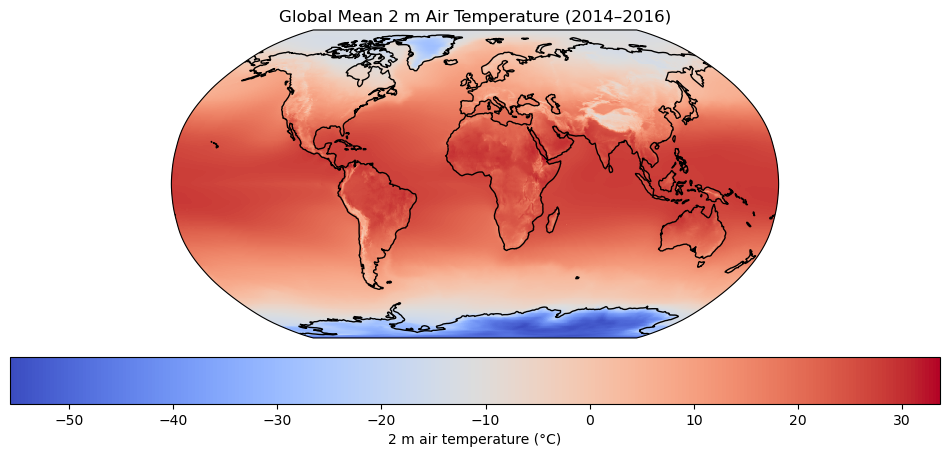

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 如果你做了摄氏度转换，用 t2m_mean_C；否则用 t2m_mean
data = t2m_mean_C if "t2m_mean_C" in globals() else t2m_mean

fig = plt.figure(figsize=(12, 5))
ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="white")

im = ax.pcolormesh(
    ds.lon,
    ds.lat,
    data,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm"
)

cbar = plt.colorbar(im, orientation="horizontal", pad=0.05)
cbar.set_label(f"2 m air temperature ({data.attrs.get('units','K')})")

ax.set_title("Global Mean 2 m Air Temperature (2014–2016)")

plt.show()


In [24]:
region = t2m_mean_C.sel(
    lon=slice(70, 140),
    lat=slice(15, 55)
)

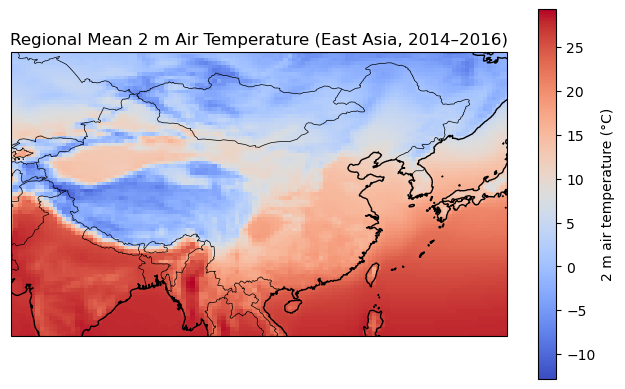

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# 区域范围
ax.set_extent([70, 140, 15, 55], crs=ccrs.PlateCarree())

# 基本要素
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="white")

# 填色图
im = ax.pcolormesh(
    region.lon,
    region.lat,
    region,
    cmap="coolwarm",
    transform=ccrs.PlateCarree()
)

# colorbar
cbar = plt.colorbar(im, orientation="vertical", shrink=0.8)
cbar.set_label("2 m air temperature (°C)")

# 标题
ax.set_title("Regional Mean 2 m Air Temperature (East Asia, 2014–2016)")

plt.show()
